In [6]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path

import bioread

In [18]:
plt.rcParams['figure.figsize'] = 50, 30  # Bigger images

In [5]:
# configure user
user = "mitchel"
extracted_feats = True

if user.lower() == "jonas":
    BASE_PATH = Path("/users/jonvdrdo/jonas/data/aaa_contextaware/raw/uz_study/")
elif user.lower() == "mitchel":
#     BASE_PATH = Path("Z:/shares/ghep_lab/2021_VanhollebekeKappen_EEGStudy2_MIST_Cyberball_Audio/")
    BASE_PATH = Path("D:/Data/2020_ResonanceBreathing/")
DATA_PATH = BASE_PATH.joinpath("Data/Raw/Physiological (ECG, EDA, RSP)")

In [10]:
DATA_PATH.joinpath("22.acq")

data = bioread.read_file('D:/Data/2020_ResonanceBreathing/Data/Raw/Physiological (ECG, EDA, RSP)/22.acq')

# Good stuff - all based on:
http://uwmadison-chm.github.io/bioread/bioread_quick_demo.html

In [14]:
data.channels

[Channel EDA100C-MRI: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel ECG100C: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel RSP100C: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel Digital input: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel Digital input: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel Digital input: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel Digital input: 10349125 samples, 1000.0 samples/sec, loaded: True,
 Channel Digital input: 10349125 samples, 1000.0 samples/sec, loaded: True]

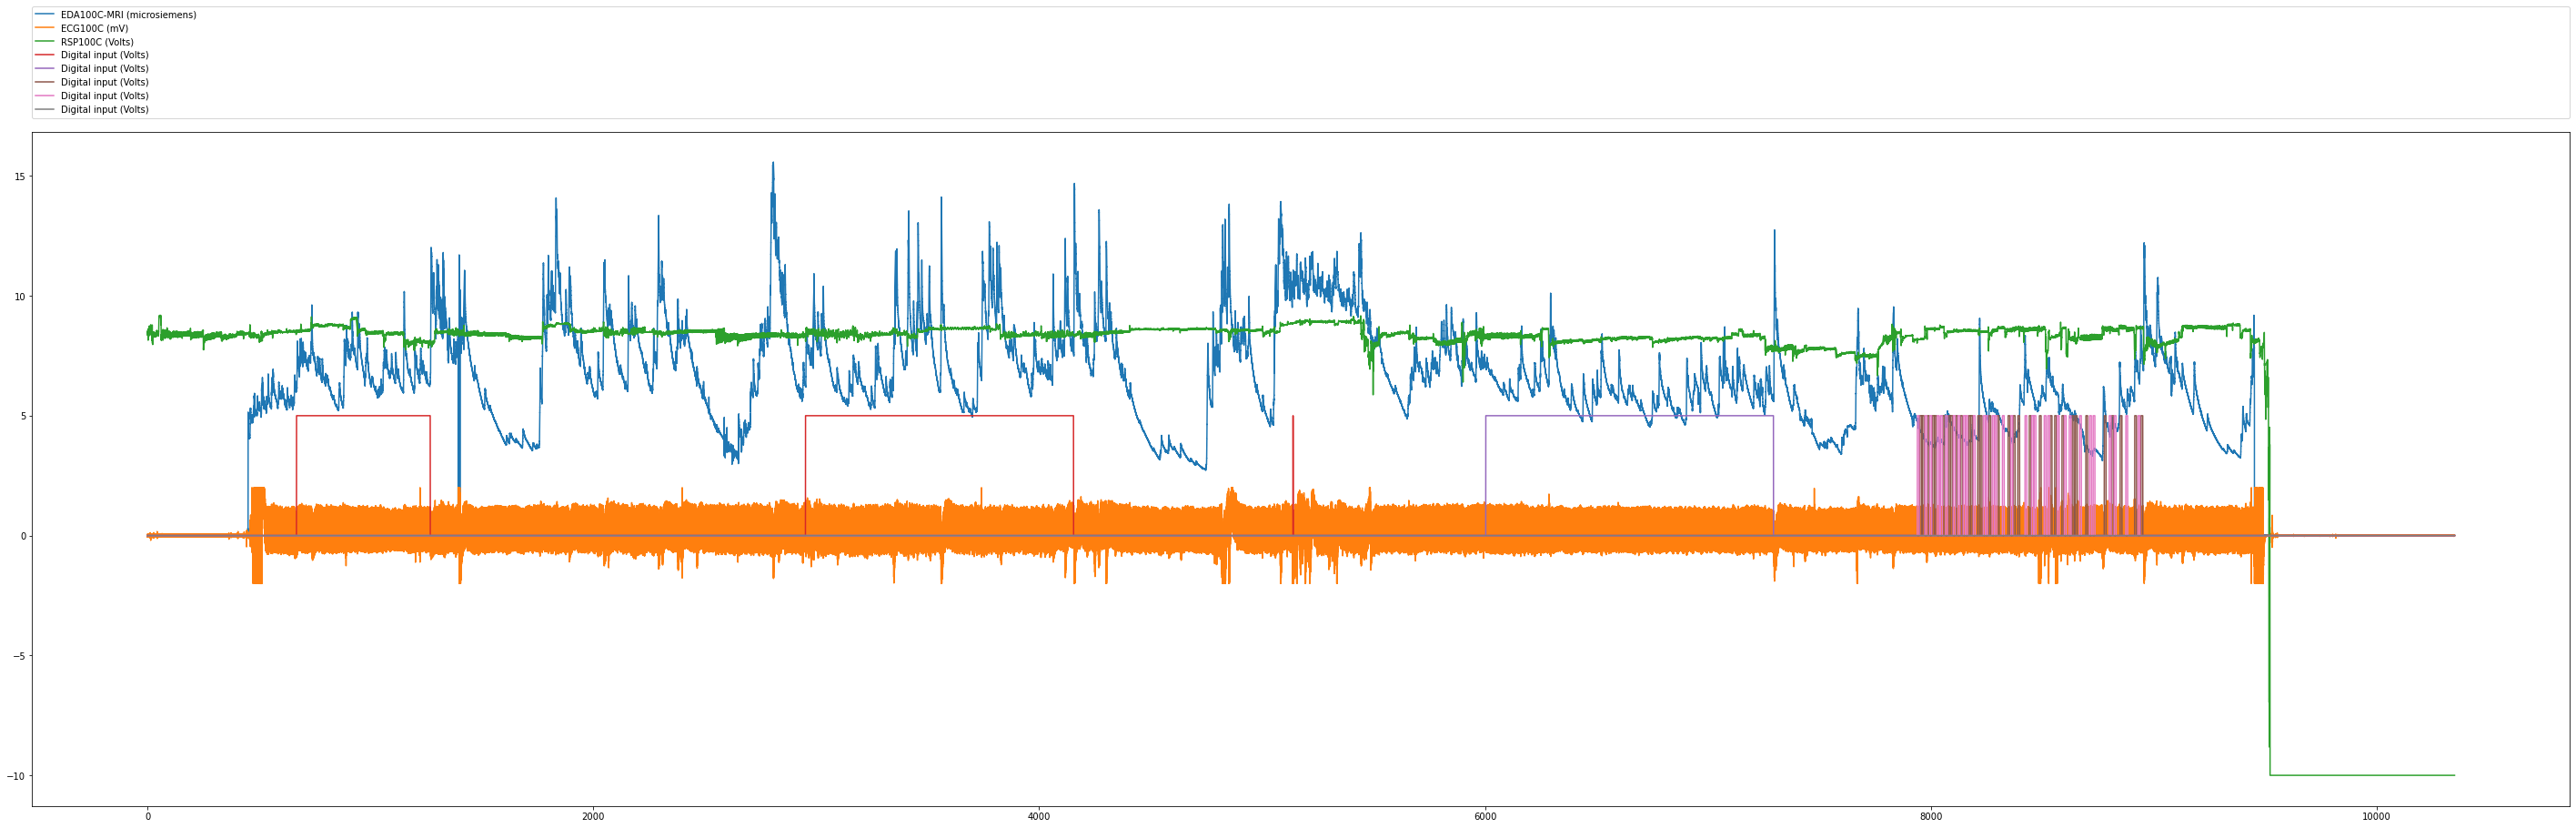

In [19]:
plt.subplot(211)

for chan in data.channels:
    plt.plot(chan.time_index, chan.data, label='{} ({})'.format(chan.name, chan.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

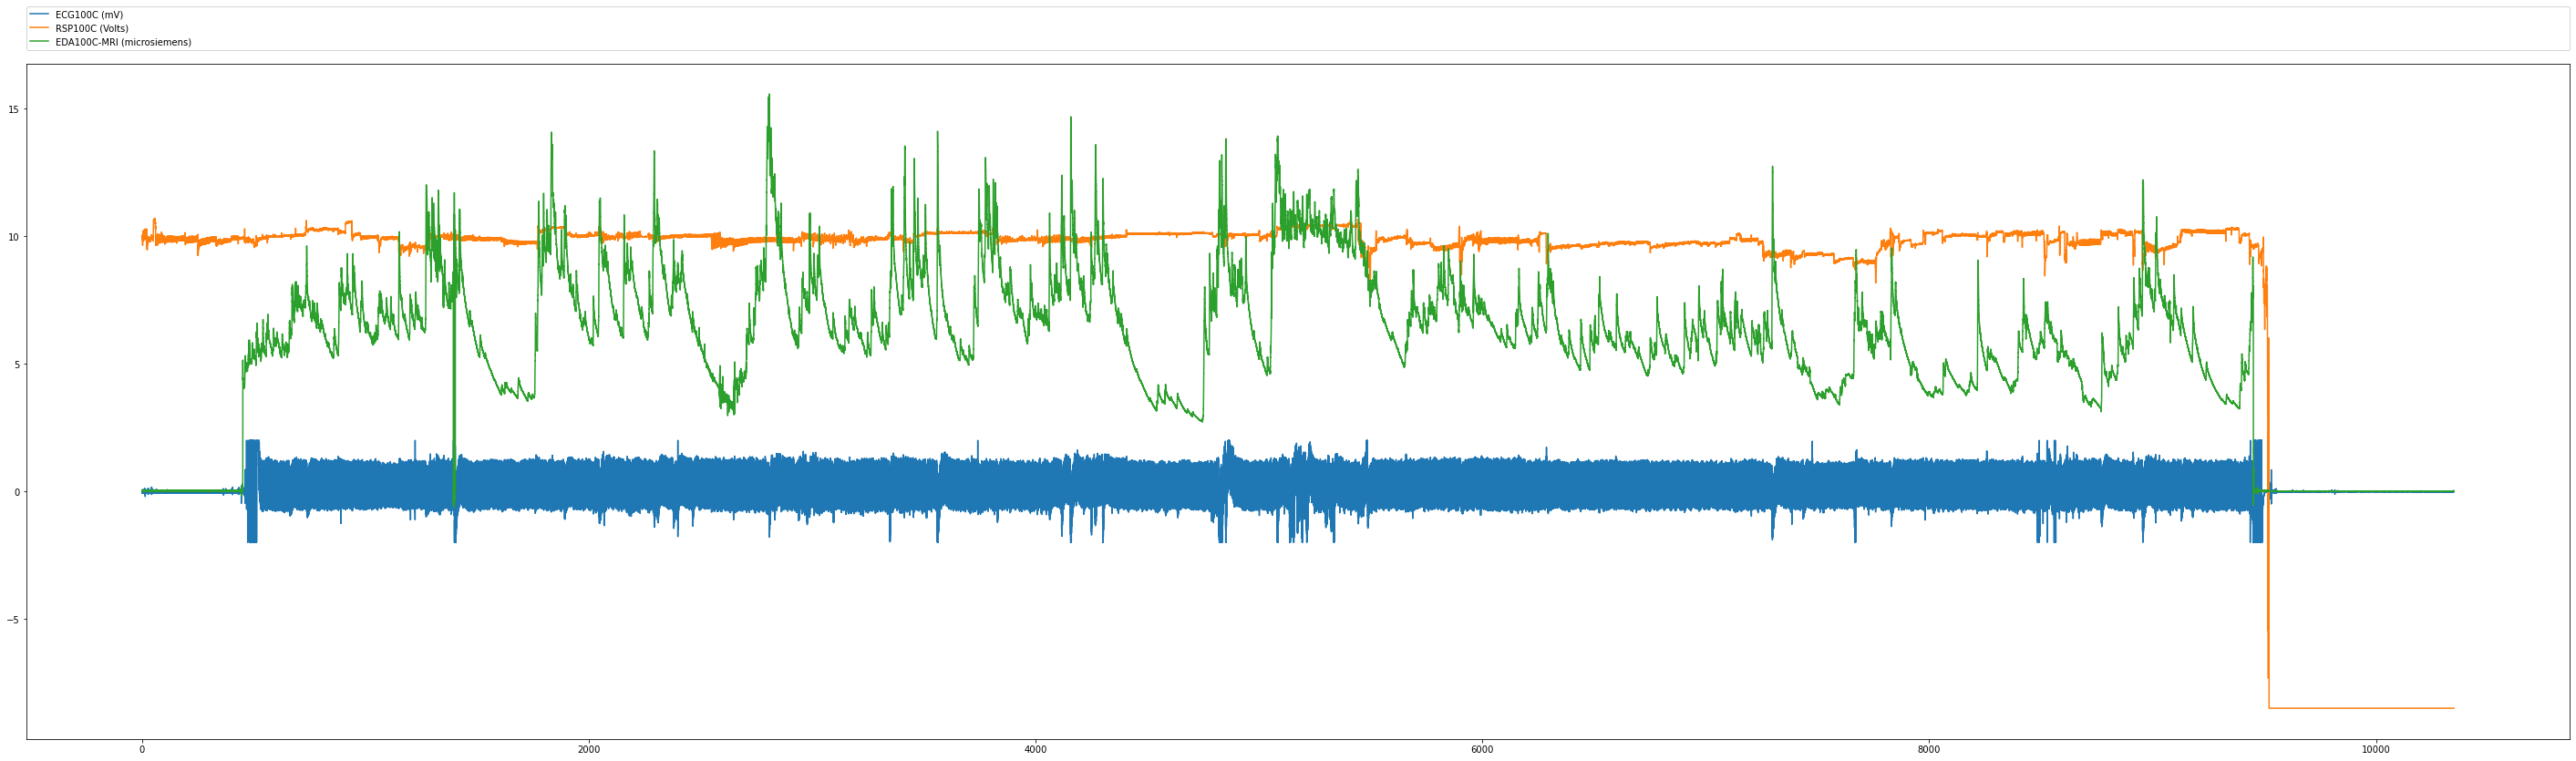

In [21]:
# And let's separate resp and ekg so we can see their traces better
plt.subplot(211)
ekg = data.channels[1]
resp = data.channels[2]
eda = data.channels[0]
plt.plot(ekg.time_index, ekg.data, label='{} ({})'.format(ekg.name, ekg.units))
plt.plot(resp.time_index, resp.data + 1.5, label='{} ({})'.format(resp.name, resp.units))
plt.plot(eda.time_index, eda.data, label='{} ({})'.format(eda.name, eda.units))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)
None  # Don't print a silly legend thing

In [44]:
data.channels[2]
dir(resp)

['_Channel__data',
 '_Channel__upsampled_data',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allocate_raw_data',
 'data',
 'data_length',
 'datafile',
 'dtype',
 'fmt_str',
 'free_data',
 'frequency_divider',
 'from_headers',
 'loaded',
 'name',
 'order_num',
 'point_count',
 'raw_data',
 'raw_offset',
 'raw_scale_factor',
 'sample_size',
 'samples_per_second',
 'time_index',
 'units',
 'upsampled_data']

# Do some neurokit stuff for feature extractions
https://neurokit2.readthedocs.io/en/latest/examples/rrv.html

In [61]:
rsp = resp.data
rsp = rsp[0:1000000] # Make a smaller frame for now to speed shit up

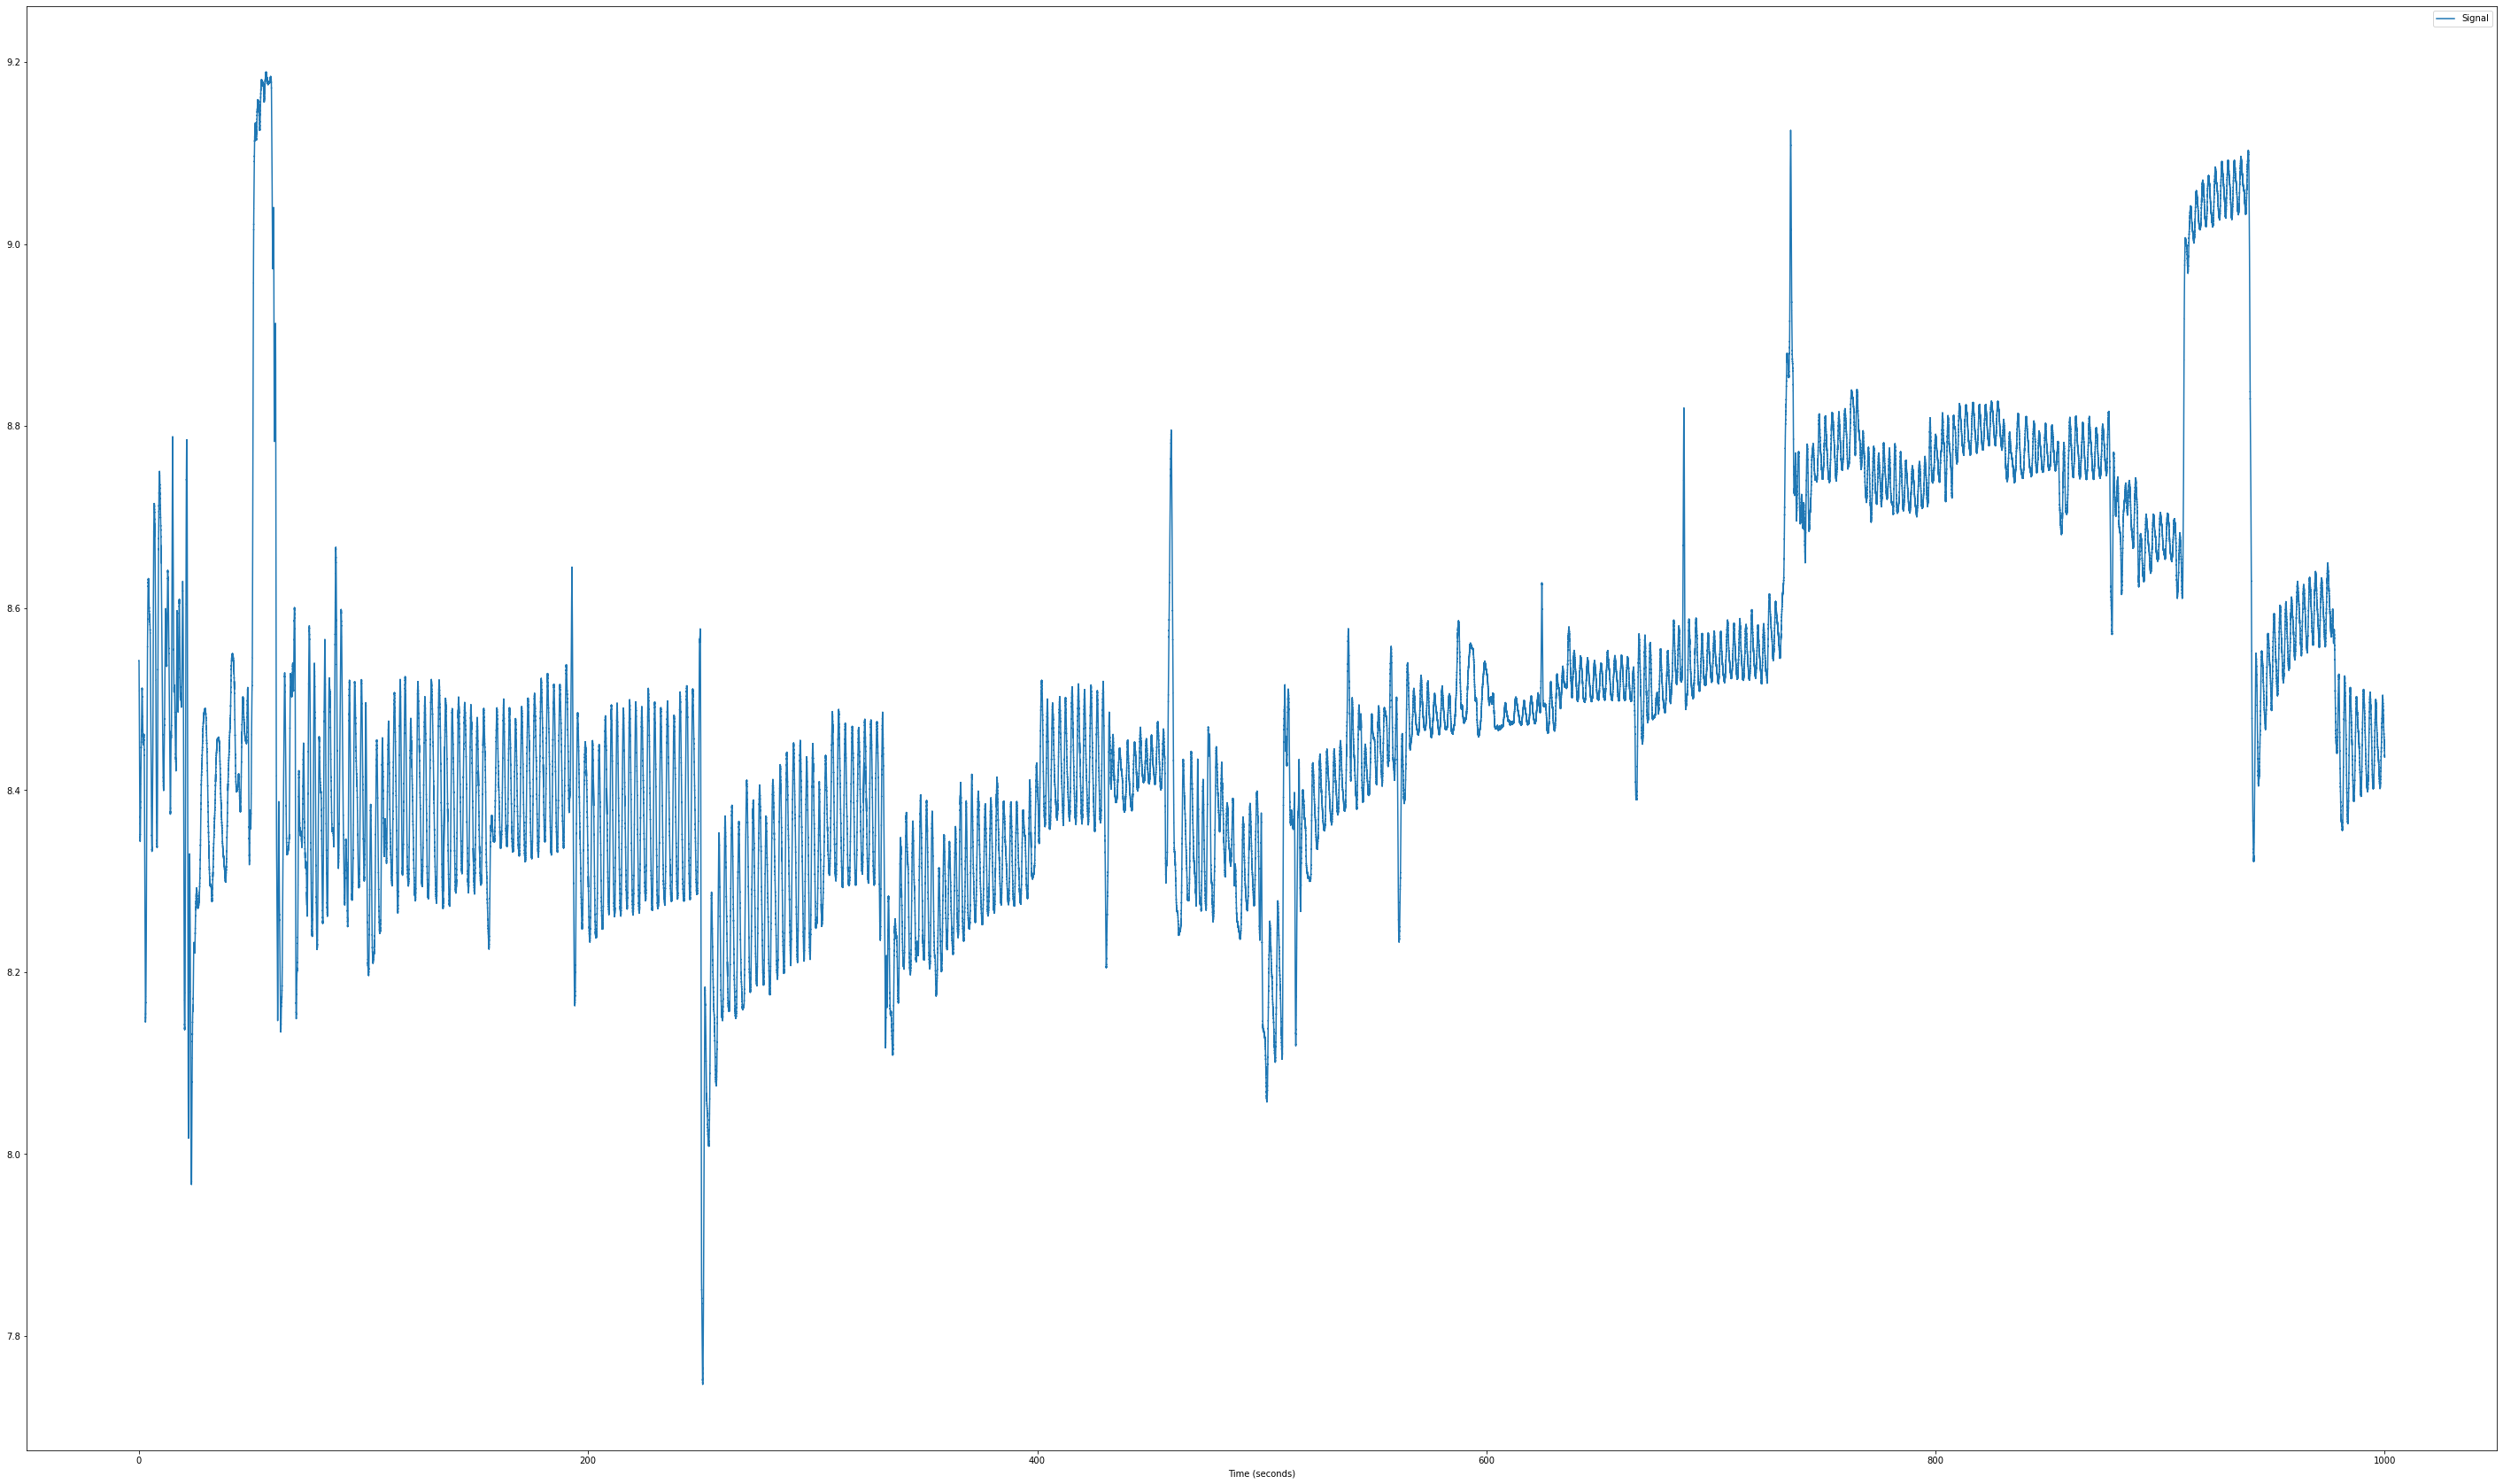

In [62]:
nk.signal_plot(rsp, sampling_rate=1000) # Visualize

In [63]:
# Clean signal
cleaned = nk.rsp_clean(rsp, sampling_rate=1000)

# Extract peaks
df, peaks_dict = nk.rsp_peaks(cleaned)
info = nk.rsp_fixpeaks(peaks_dict)
formatted = nk.signal_formatpeaks(info, desired_length=len(cleaned),peak_indices=info["RSP_Peaks"])

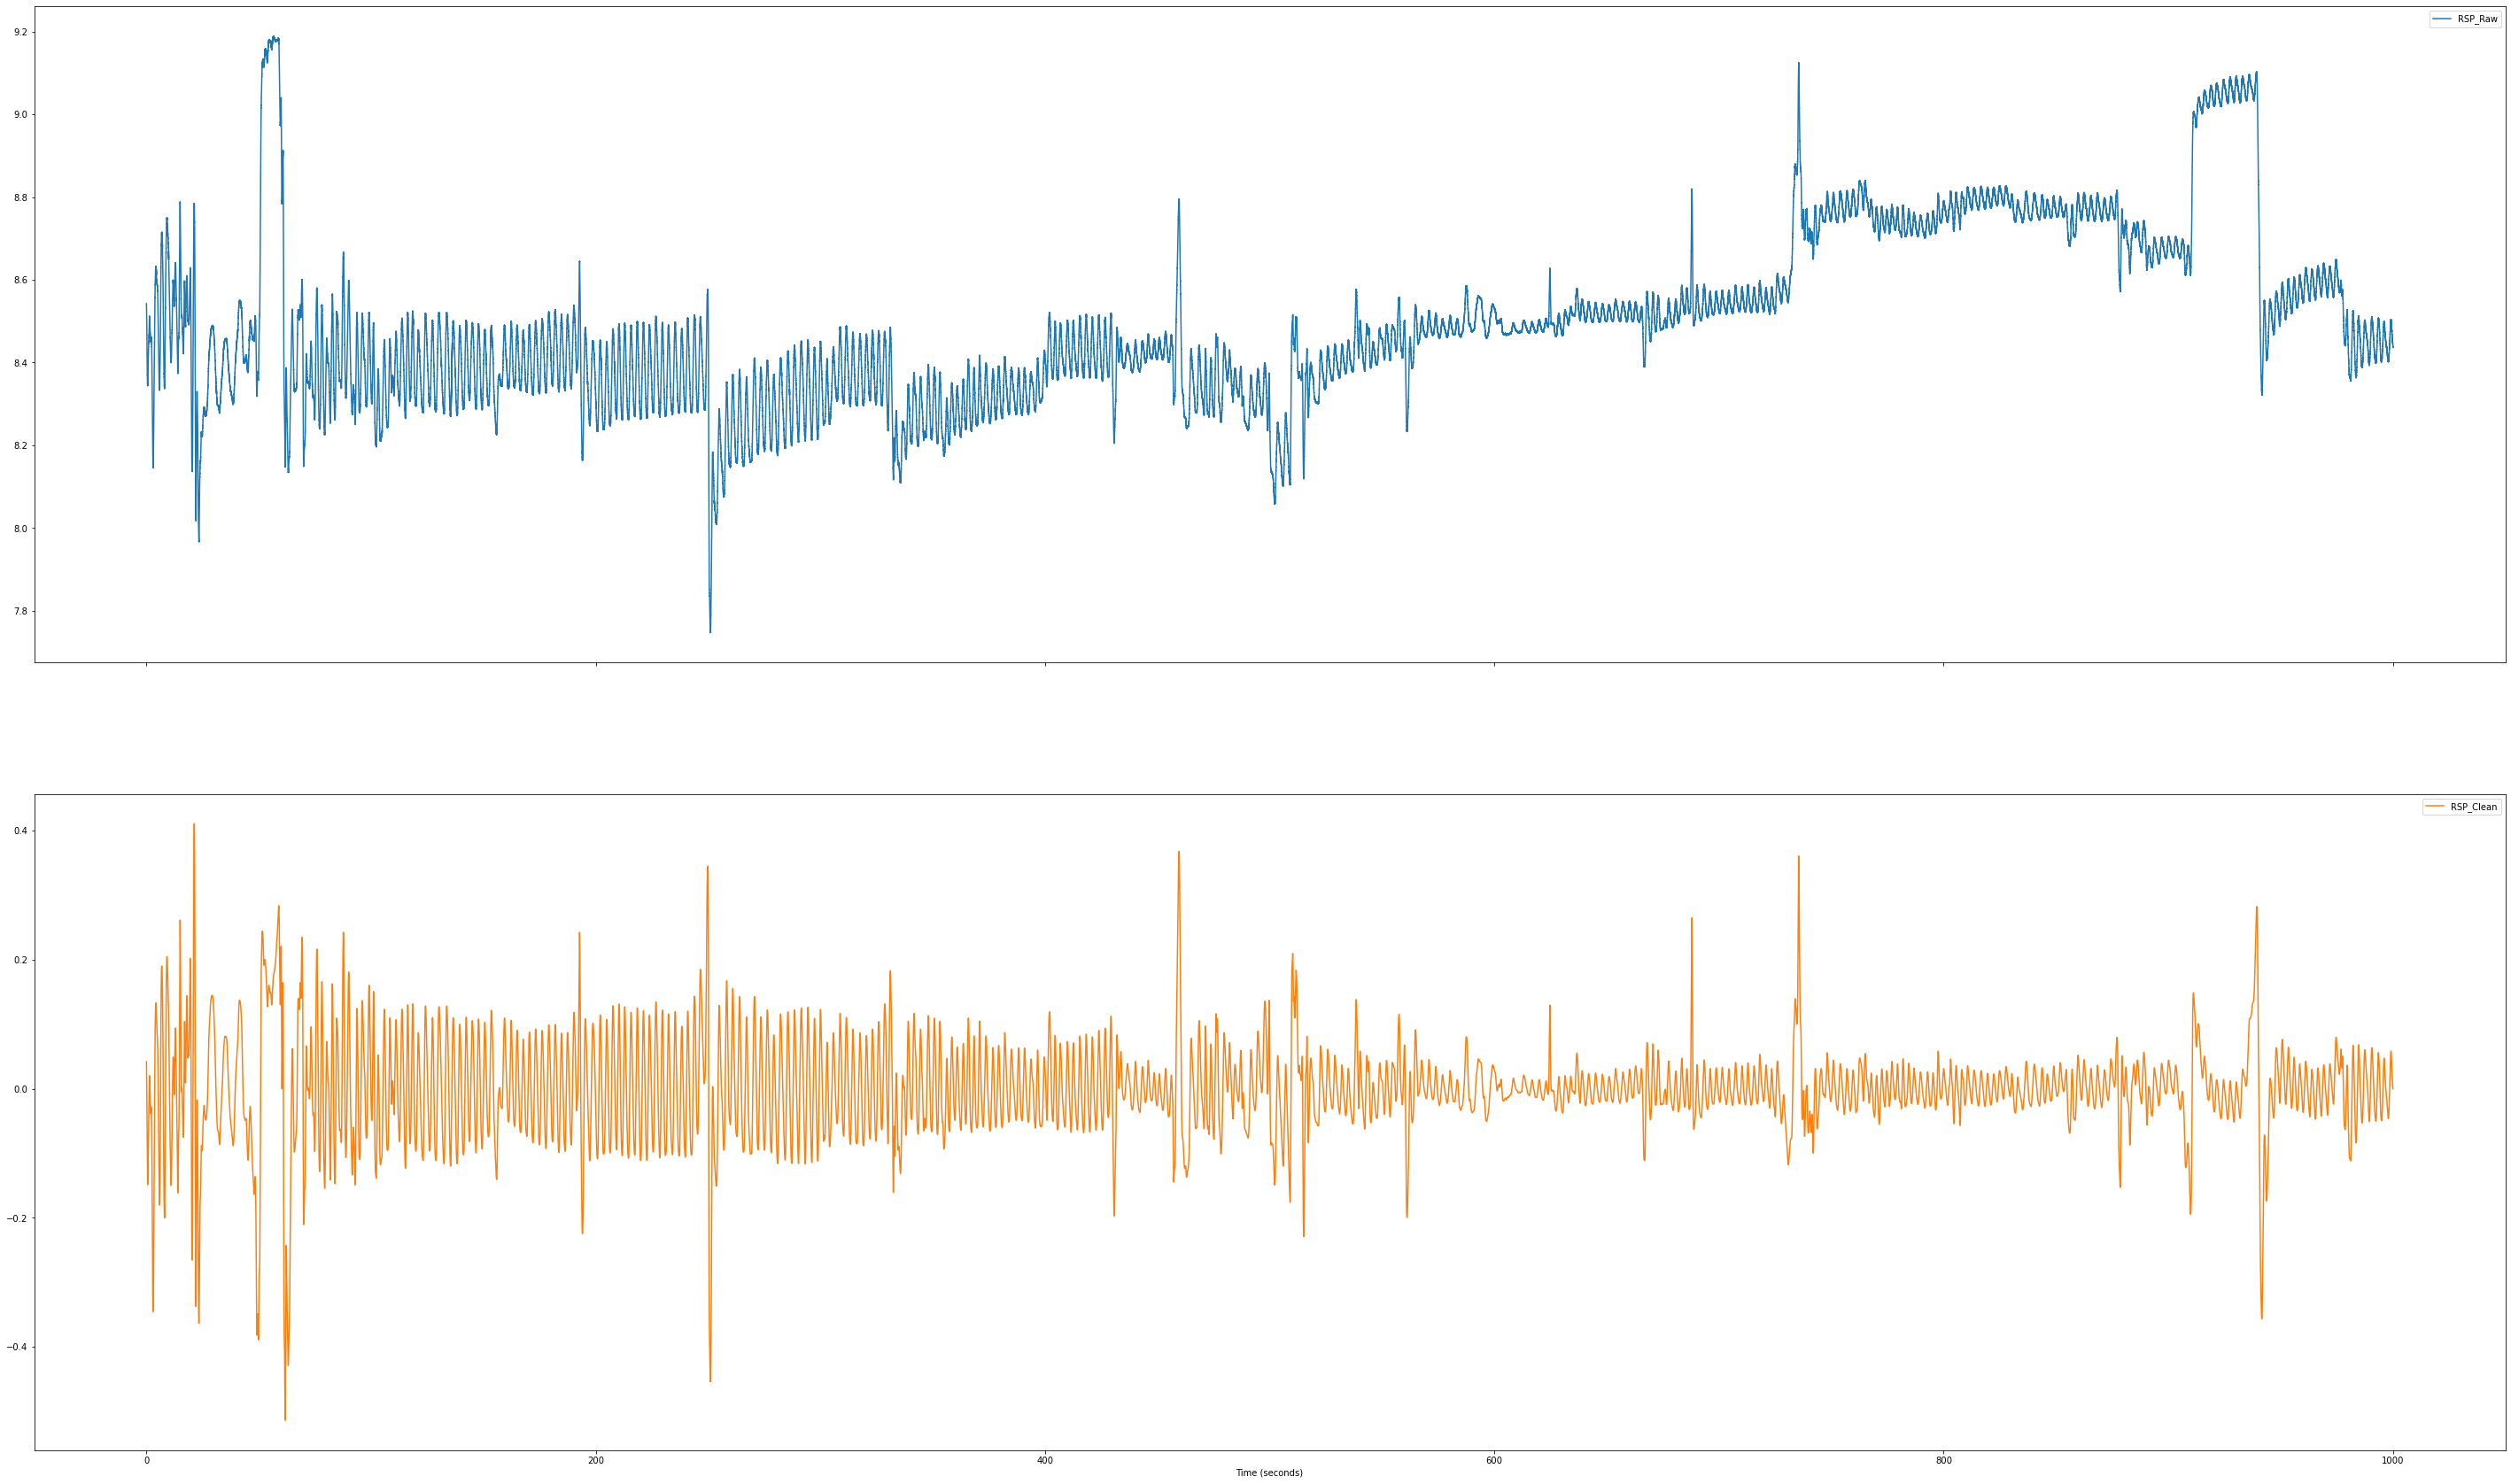

In [64]:
nk.signal_plot(pd.DataFrame({"RSP_Raw": rsp, "RSP_Clean": cleaned}), sampling_rate=1000, subplots=True)

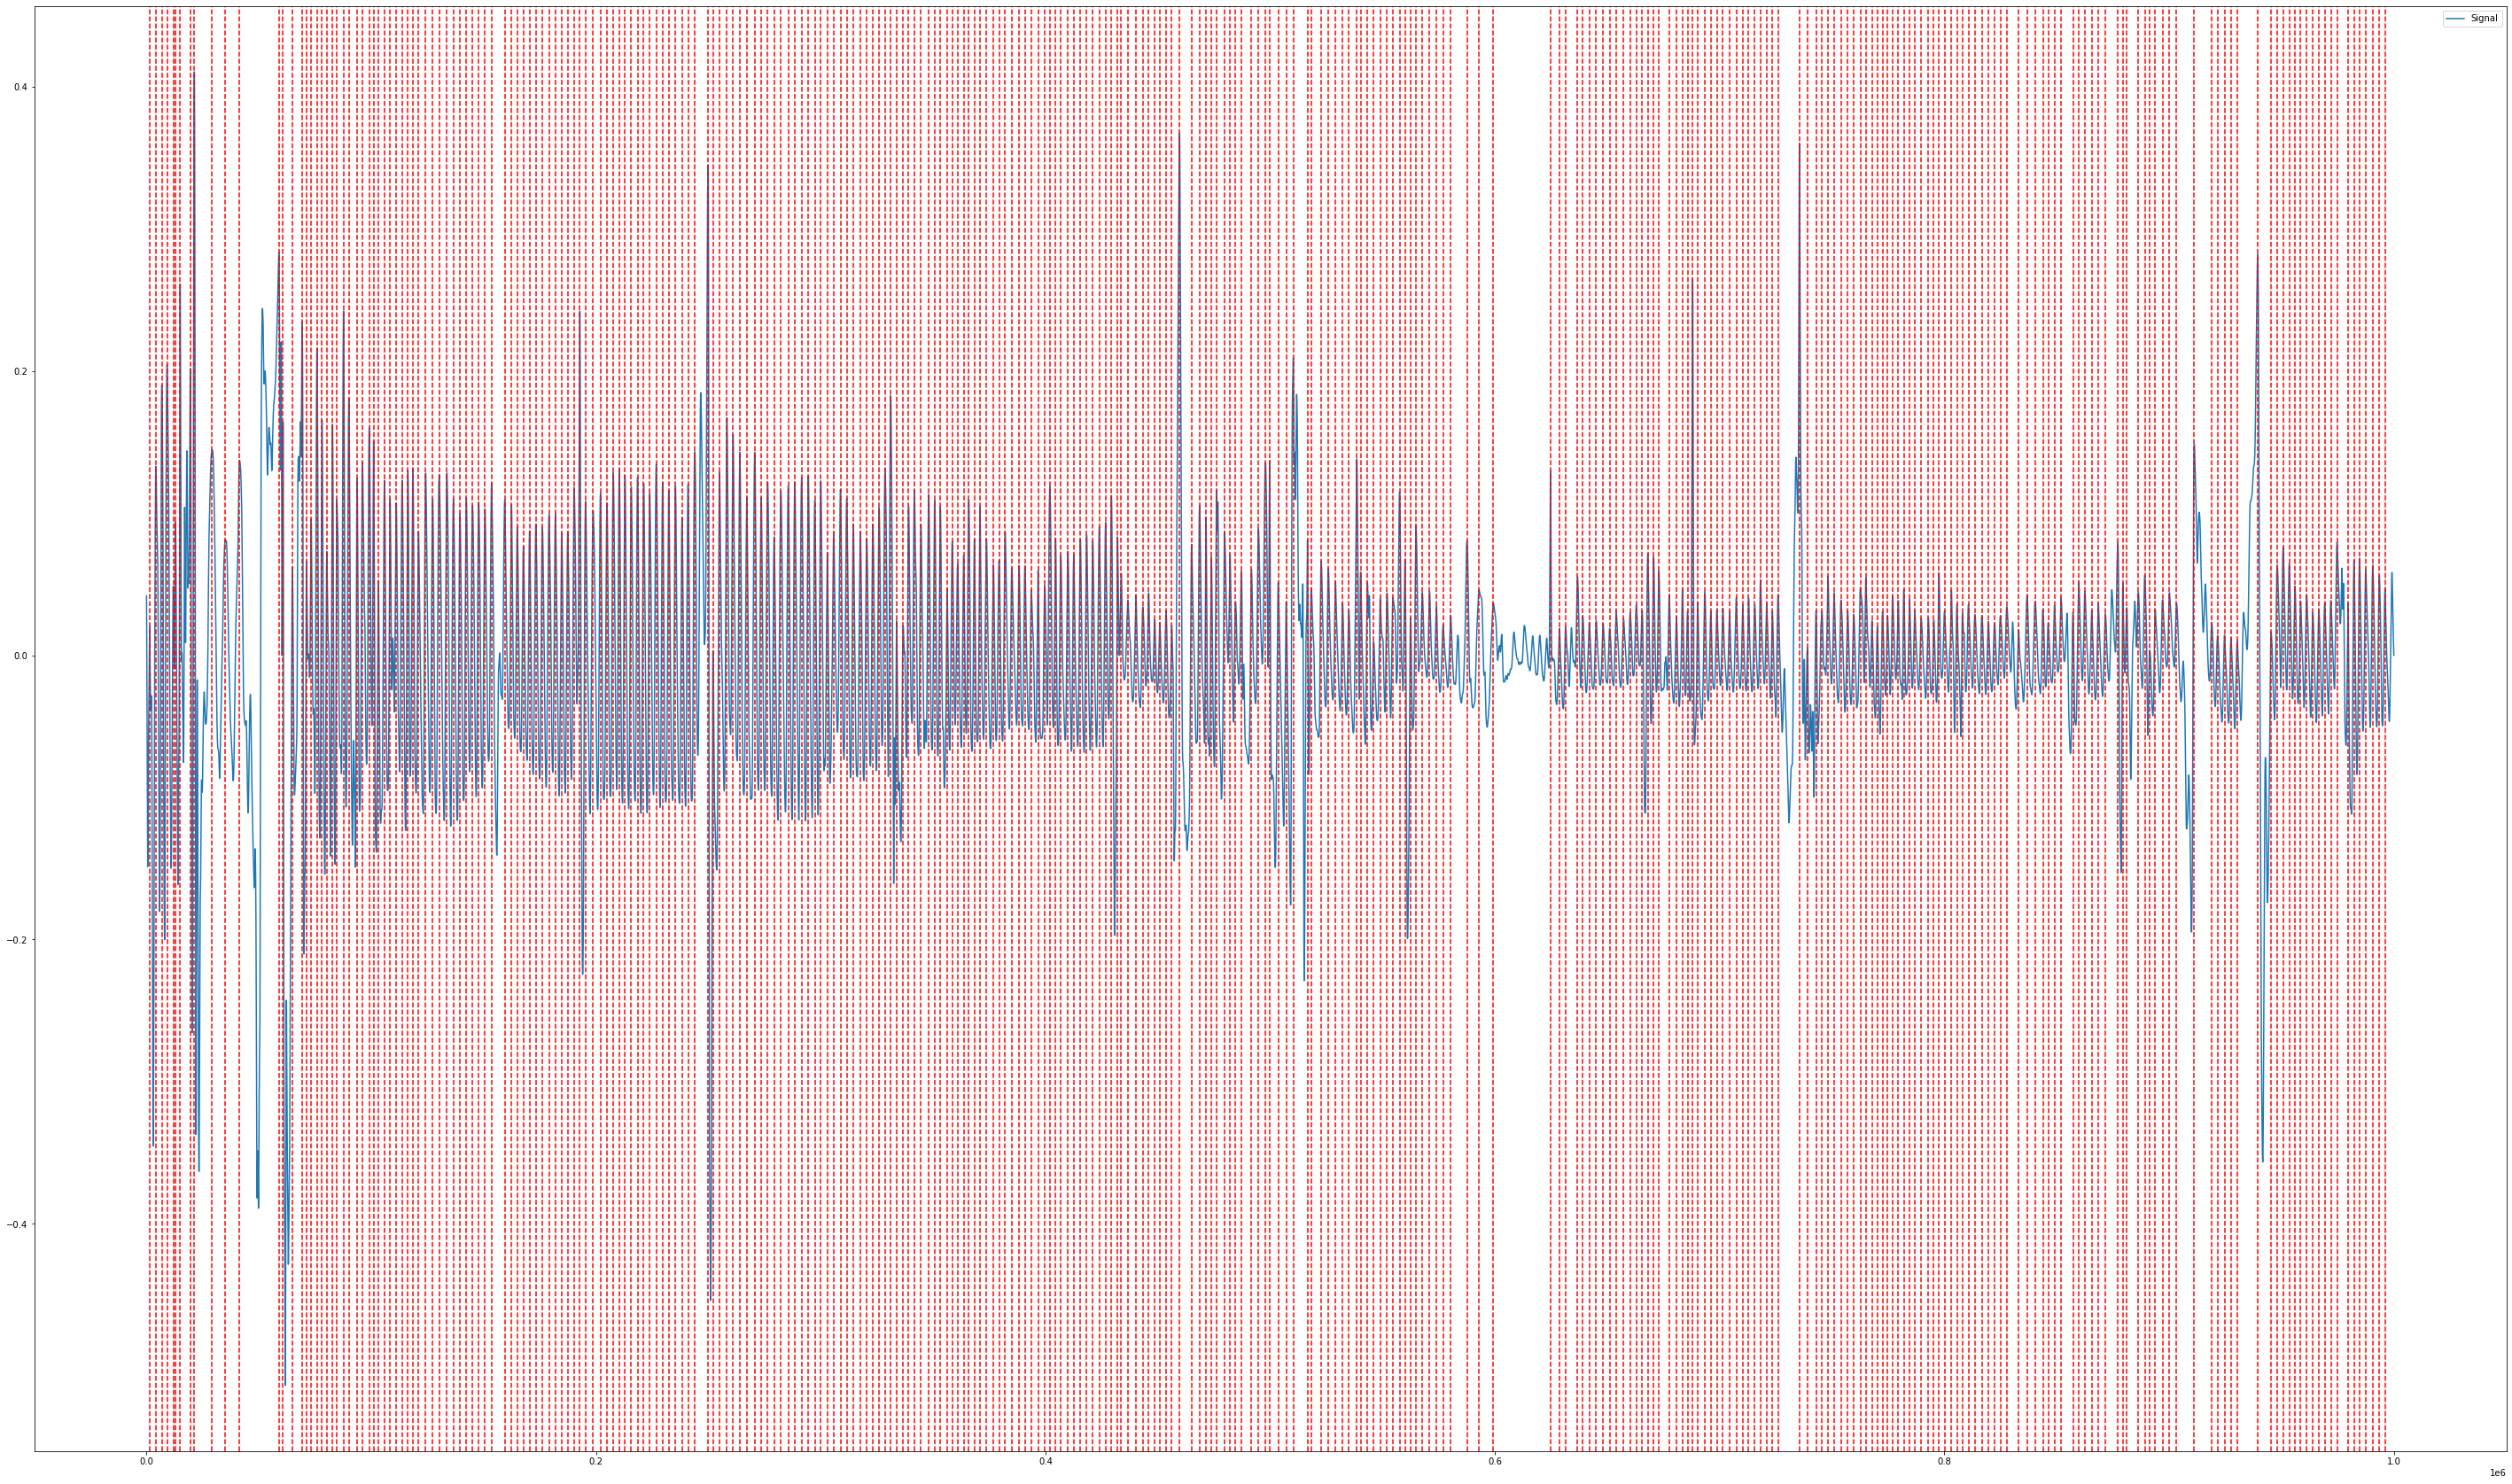

In [65]:
candidate_peaks = nk.events_plot(peaks_dict['RSP_Peaks'], cleaned)

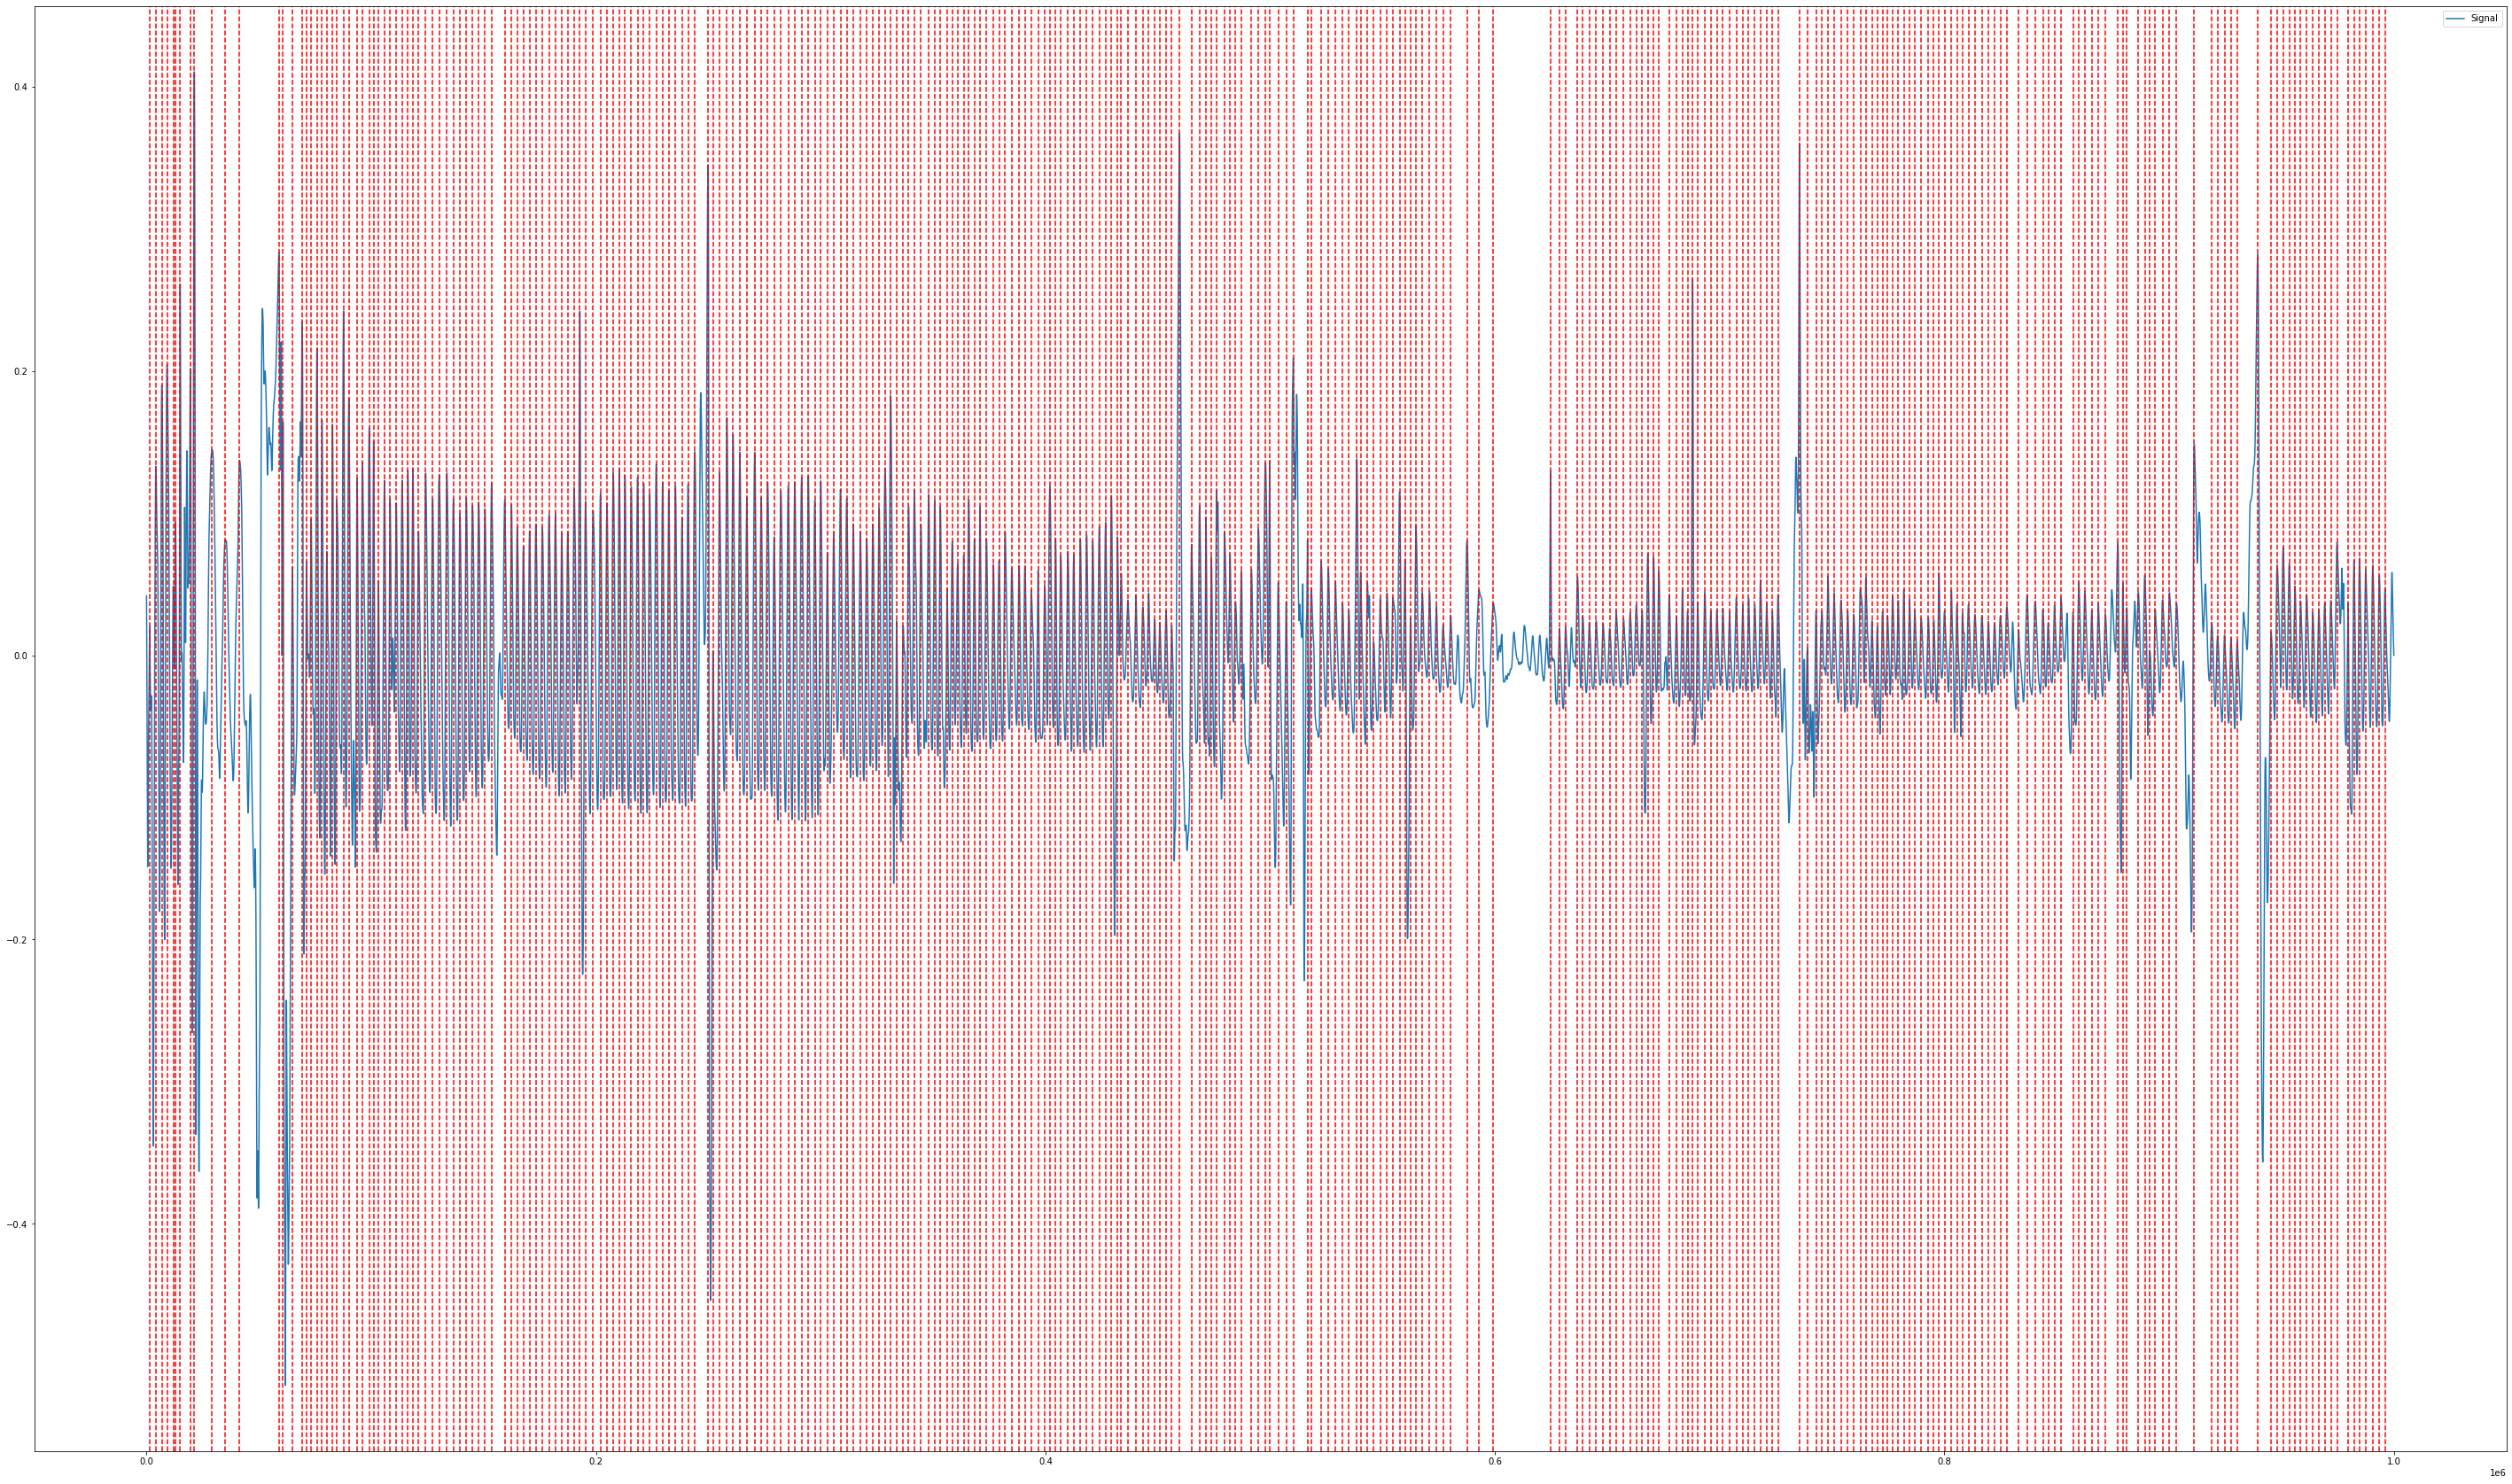

In [66]:
fixed_peaks = nk.events_plot(info['RSP_Peaks'], cleaned)

Text(0, 0.5, 'BPM')

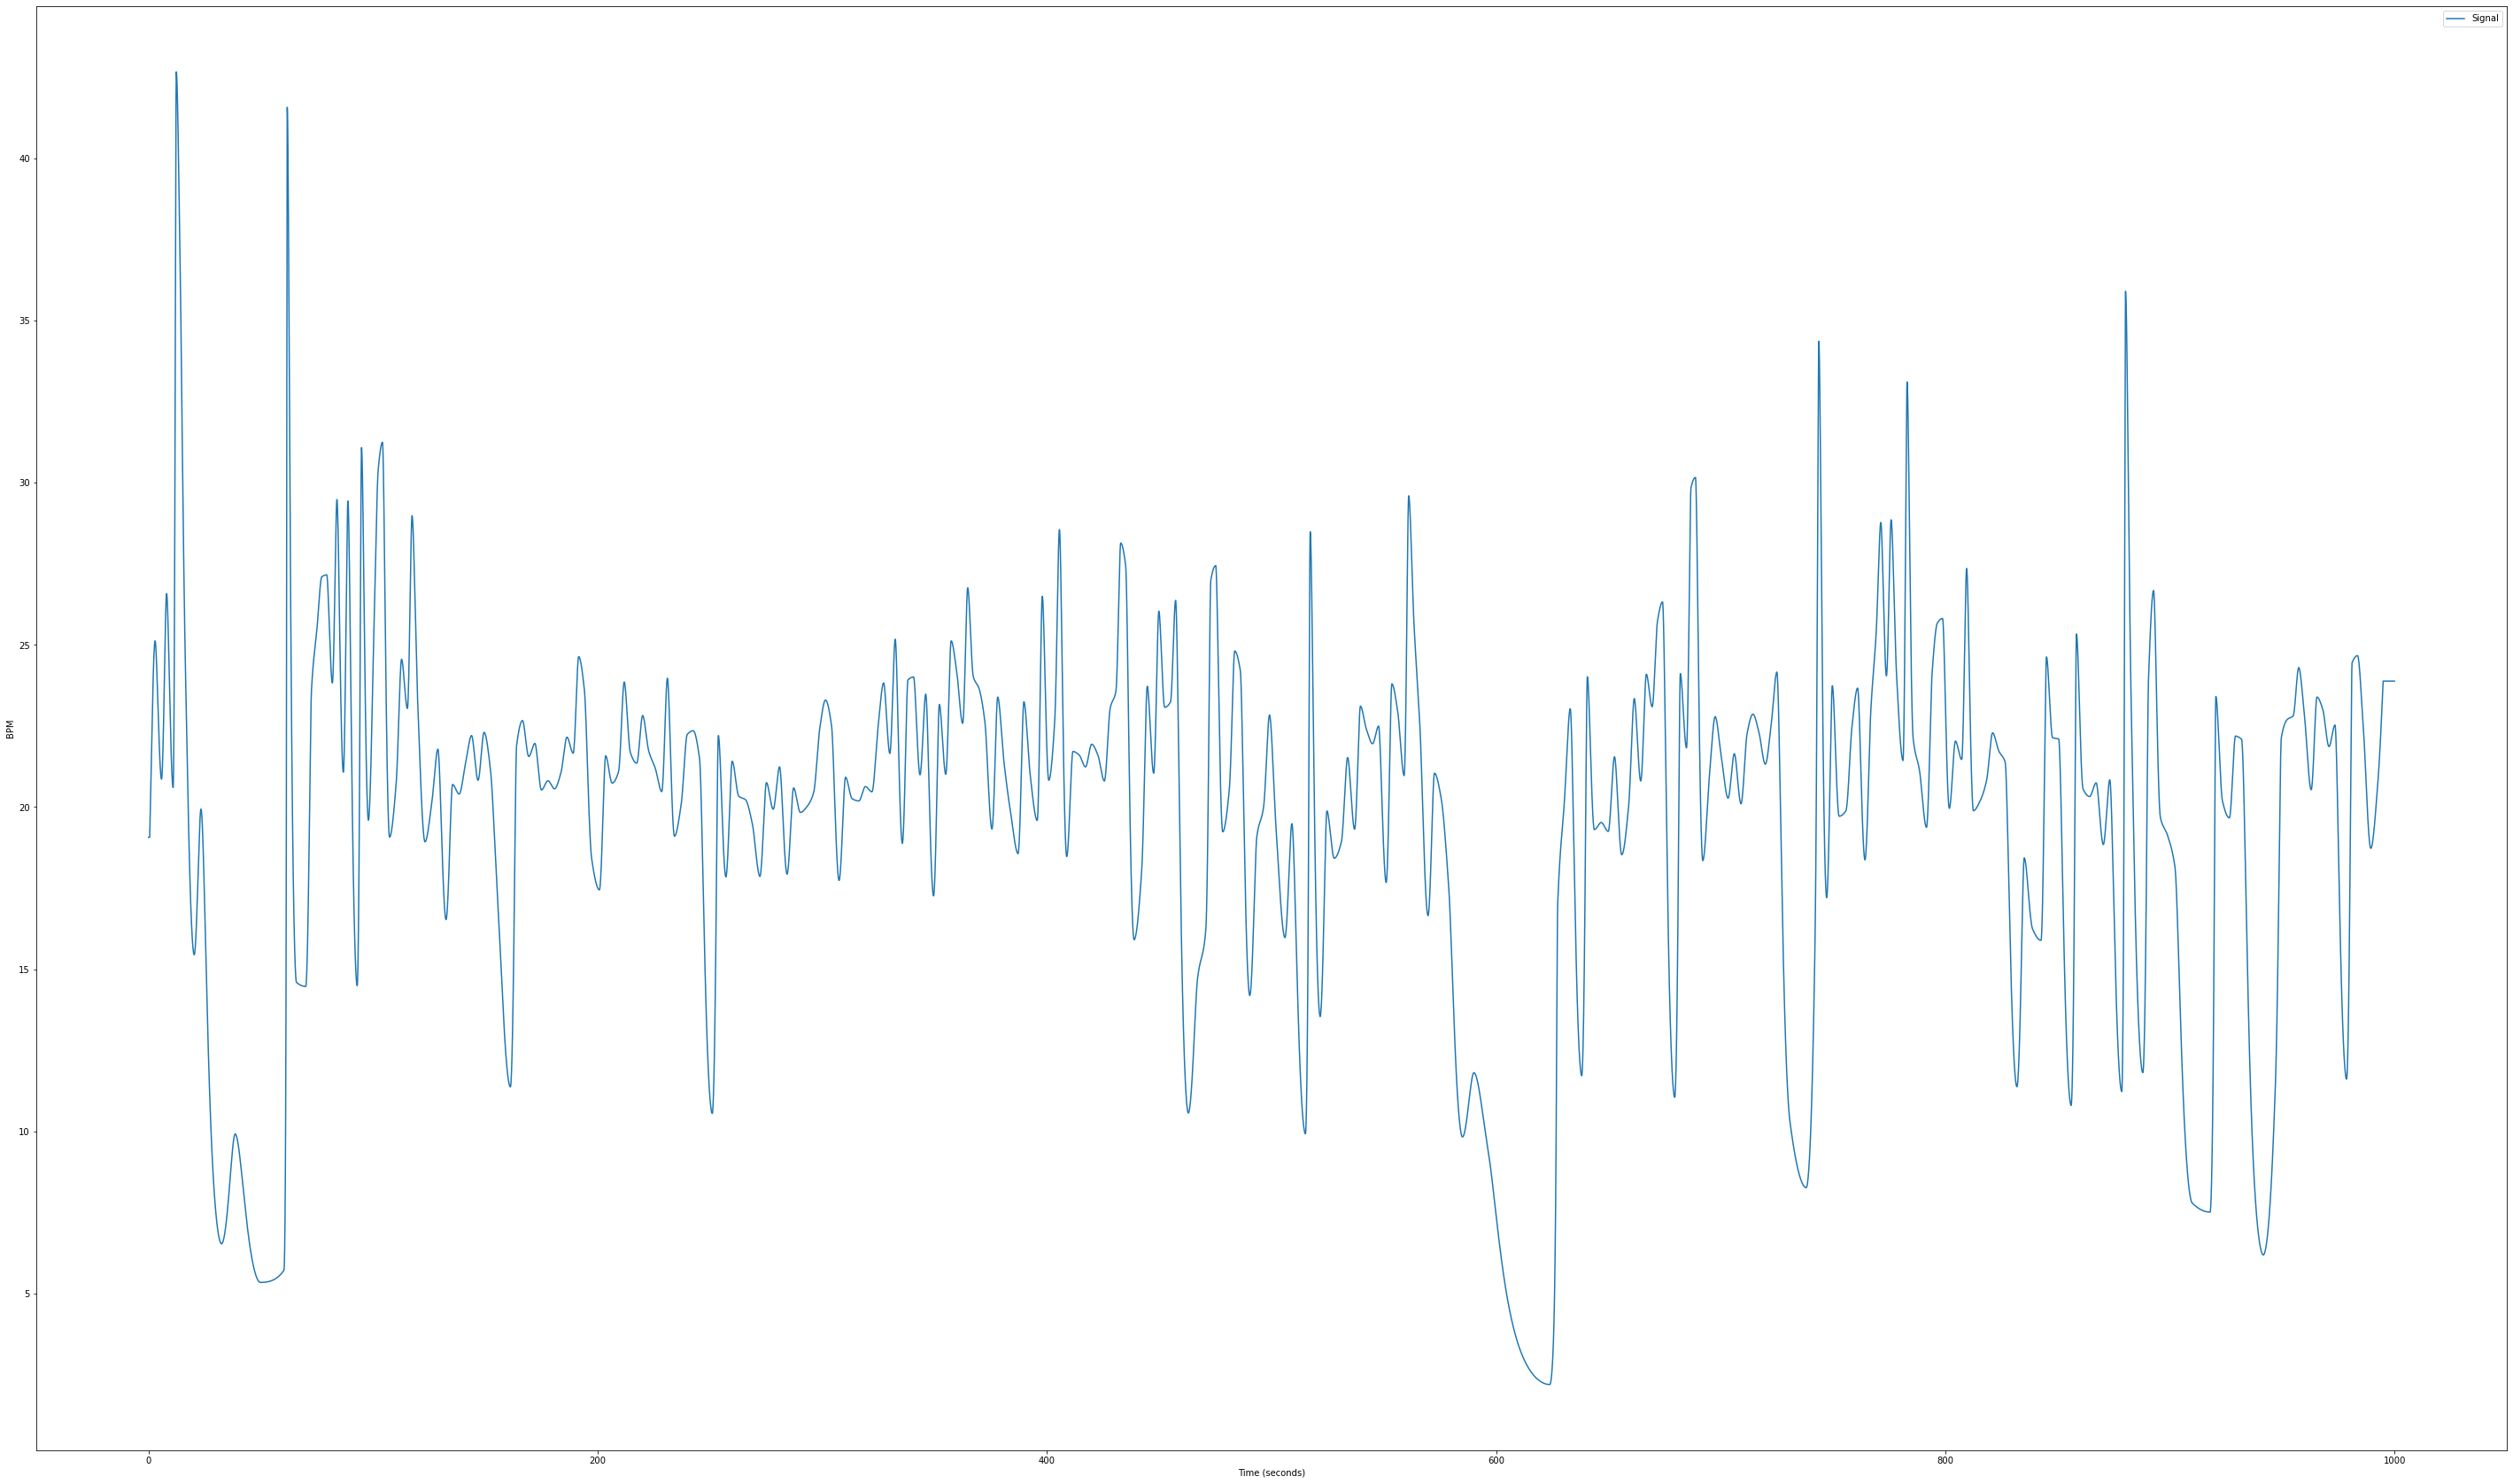

In [68]:
# Extract rate
rsp_rate = nk.rsp_rate(cleaned, peaks_dict, sampling_rate=1000)

# Visualize
nk.signal_plot(rsp_rate, sampling_rate=1000)
plt.ylabel('BPM')

# RRV - Respiratory Rate Variability

RRV_RMSSD   RRV_MeanBB     RRV_SDBB     RRV_SDSD  RRV_CVBB  RRV_CVSD  \
0  2248.658079  3146.768987  1821.816998  2252.235864  0.578948  0.714593   

   RRV_MedianBB  RRV_MadBB  RRV_MCVBB   RRV_VLF  ...  RRV_DFA_alpha1  \
0        2797.0   379.5456   0.135697  0.010673  ...         0.86968   

   RRV_DFA_alpha1_ExpRange  RRV_DFA_alpha1_ExpMean  RRV_DFA_alpha1_DimRange  \
0                 2.161217                1.252019                  2.06388   

   RRV_DFA_alpha1_DimMean  RRV_DFA_alpha2  RRV_DFA_alpha2_ExpRange  \
0               -0.128683        0.582784                 0.811258   

   RRV_DFA_alpha2_ExpMean  RRV_DFA_alpha2_DimRange  RRV_DFA_alpha2_DimMean  
0                0.564094                 1.199274                0.648706  

[1 rows x 30 columns]

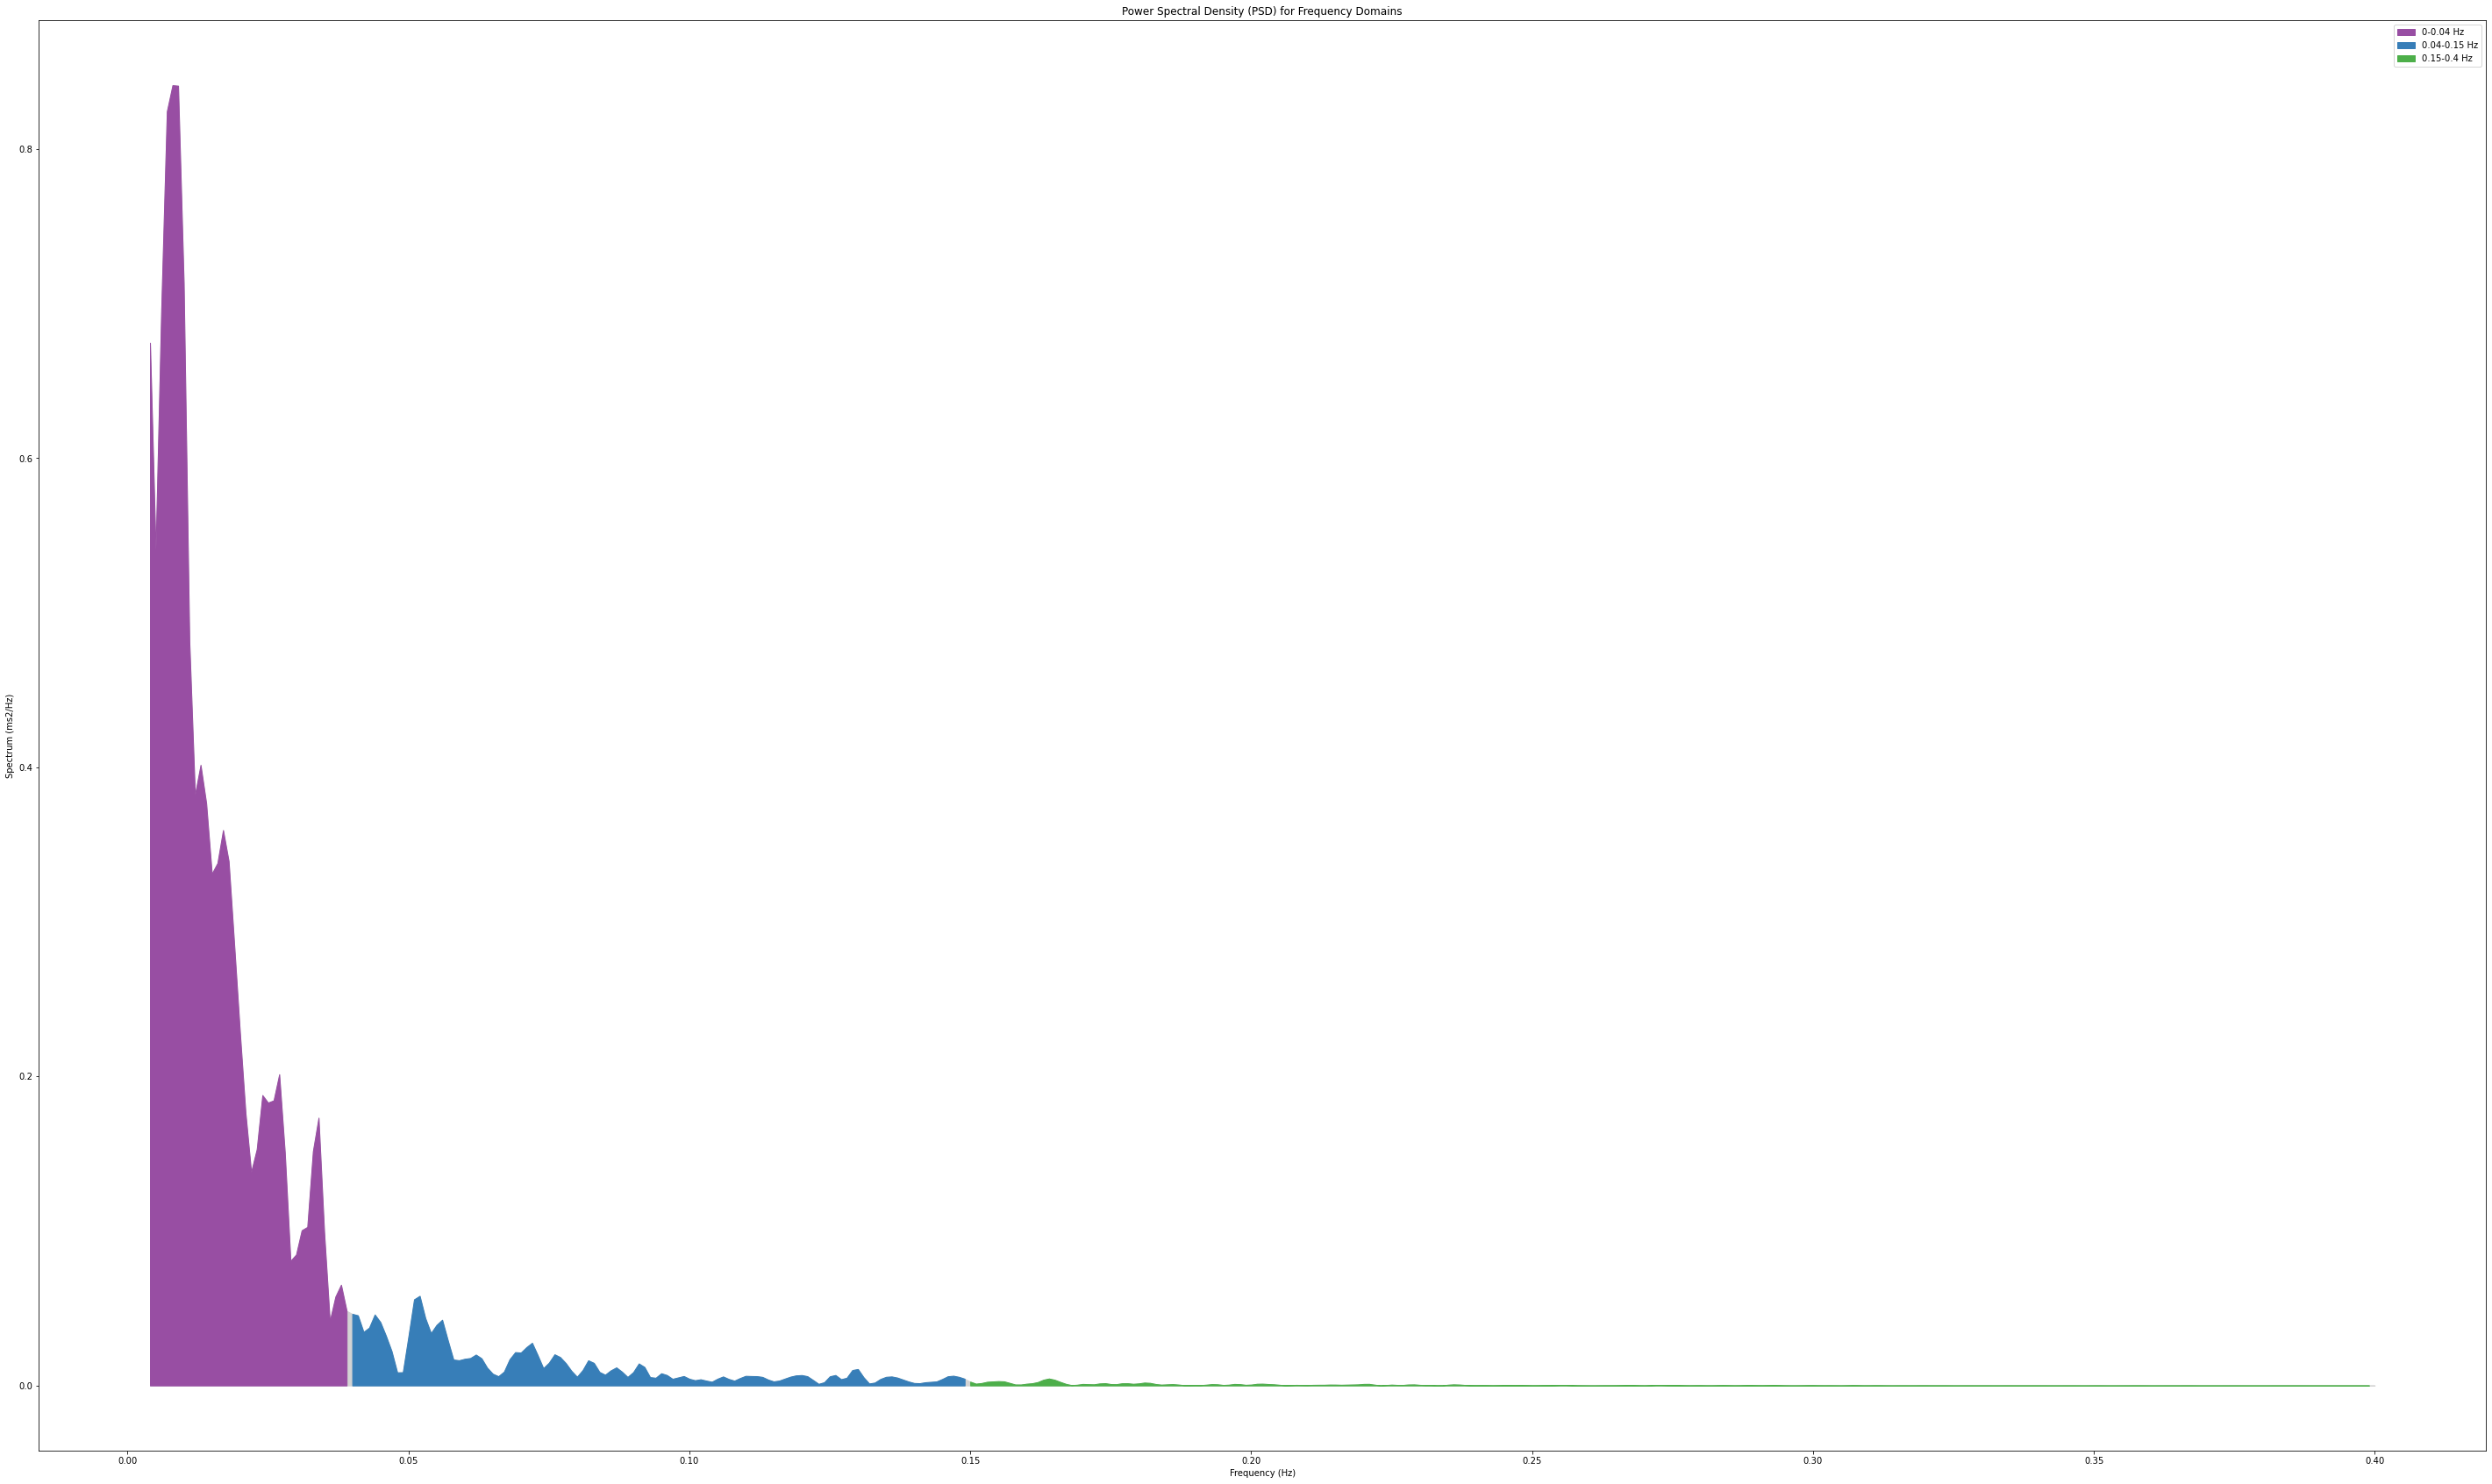

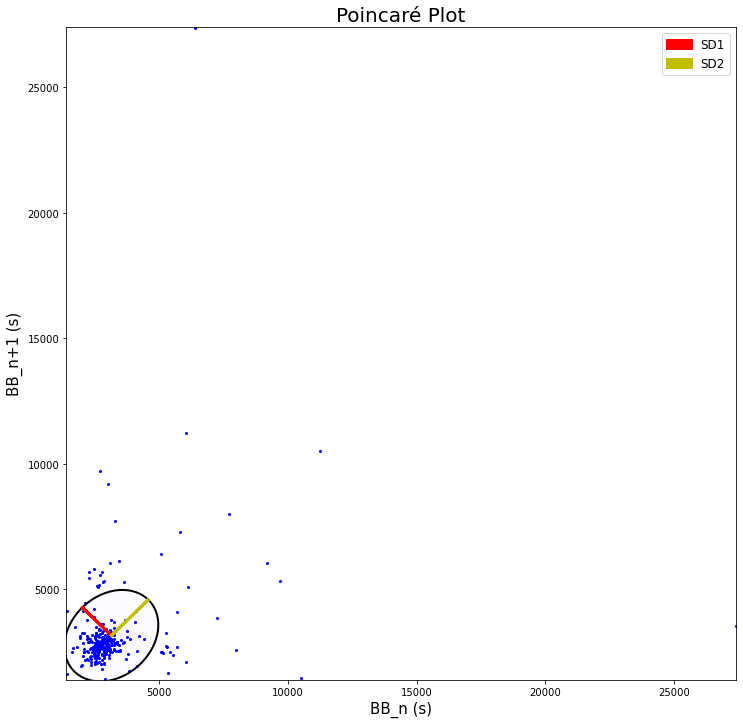

In [70]:
rrv = nk.rsp_rrv(rsp_rate, info, sampling_rate=1000, show=True)
rrv